In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
release_pos = np.load('./release_pos.npy')
velosity_matrix = np.load('./velosity_matrix.npy')
DXsec_Al = np.load('./DXsec_Al.npy')

(656436, 3)


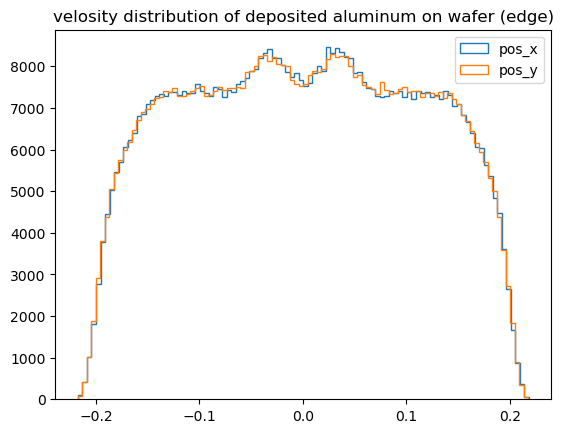

In [3]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(656436, 3)


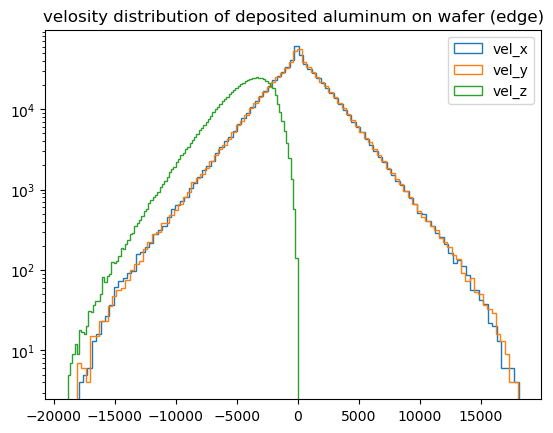

In [4]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [5]:
TS = 0.3 #300mm
# release_pos[:,0] += 0.24
# release_pos[:,1] += 0.24
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

-0.21737656662332352
0.21818405970120067
-0.21757853265272176
0.21800343584051401


(656436, 3)


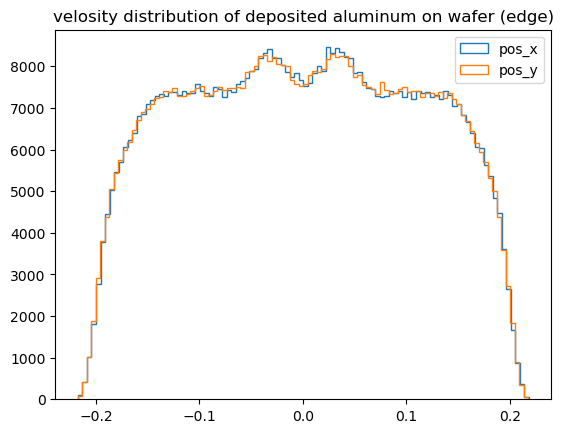

In [6]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [7]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-7, temperature=300, cellSize=[240, 240, 150], celllength=0.48/240, chamberSize=[0.24, 0.24], DXsec=DXsec_Al)
transport.setXsec(energy_range=[0, 50, 50])

l:\ysy\etching\CollisionModule.py:70: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))


array([0.00000000e+00, 2.48469445e-19, 2.13253357e-19, 1.95014882e-19,
       1.83028518e-19, 1.74240899e-19, 1.67375019e-19, 1.61781505e-19,
       1.57087507e-19, 1.53060285e-19, 1.49545376e-19, 1.46435341e-19,
       1.43652611e-19, 1.41139470e-19, 1.38851878e-19, 1.36755521e-19,
       1.34823170e-19, 1.33032883e-19, 1.31366734e-19, 1.29809902e-19,
       1.28350001e-19, 1.26976583e-19, 1.25680757e-19, 1.24454901e-19,
       1.23292430e-19, 1.22187624e-19, 1.21135481e-19, 1.20131605e-19,
       1.19172114e-19, 1.18253562e-19, 1.17372878e-19, 1.16527314e-19,
       1.15714403e-19, 1.14931921e-19, 1.14177857e-19, 1.13450388e-19,
       1.12747855e-19, 1.12068745e-19, 1.11411676e-19, 1.10775379e-19,
       1.10158690e-19, 1.09560536e-19, 1.08979929e-19, 1.08415954e-19,
       1.07867764e-19, 1.07334573e-19, 1.06815650e-19, 1.06310317e-19,
       1.05817939e-19, 1.05337924e-19])

In [8]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-3)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

running: 100%|██████████████████████████████████████████████████████| 100/100 [02:52<00:00, 1.73s/B]


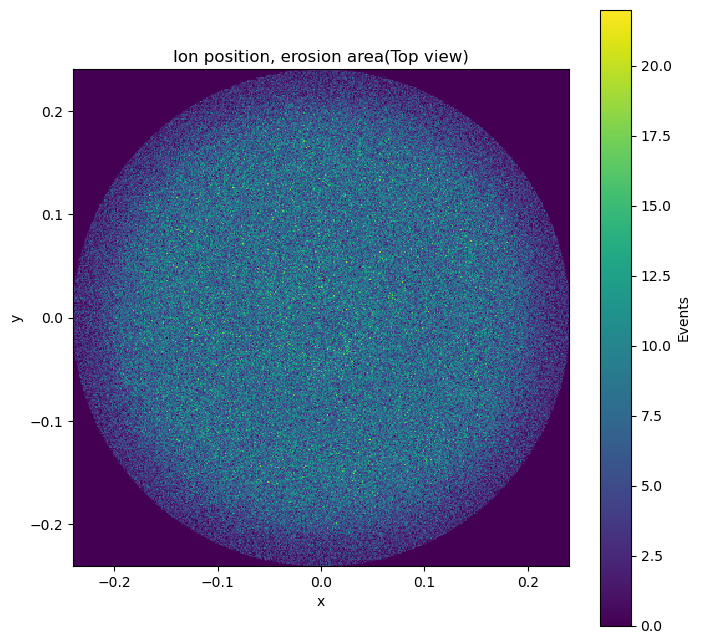

In [9]:
x_erosion_np = result[1][:,0]
y_erosion_np = result[1][:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

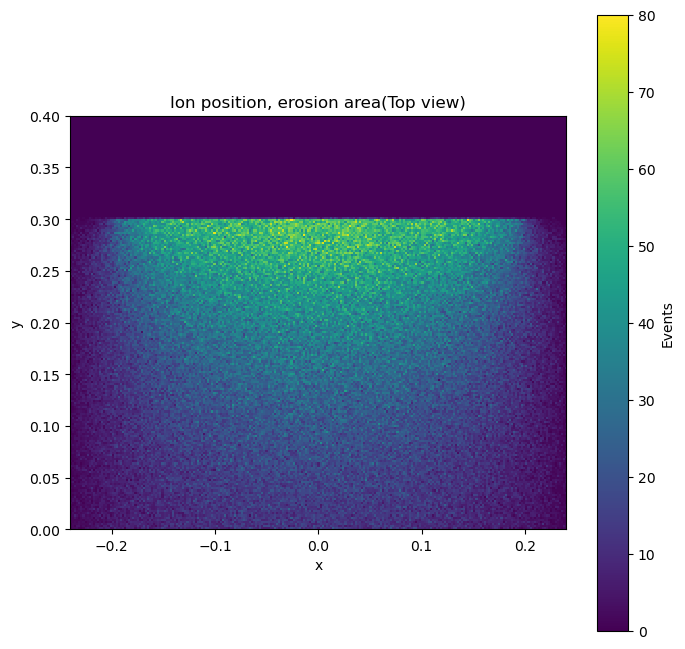

In [10]:
x_erosion_np = result[1][:,0]
z_erosion_np = result[1][:,2]

xbins = np.linspace(-0.24,0.24,240)
zbins = np.linspace(0,0.4,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [11]:
depo_pv = result[2]
a = np.array(depo_pv)
print(a.shape)

(272060, 6)


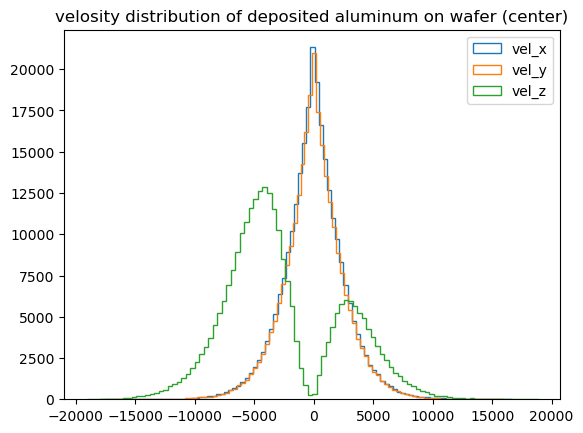

In [12]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [16]:
center_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
center_indices |= np.logical_and(a[:,1] > 0.2, a[:,1] < 0.28)
center_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(183382, 6)


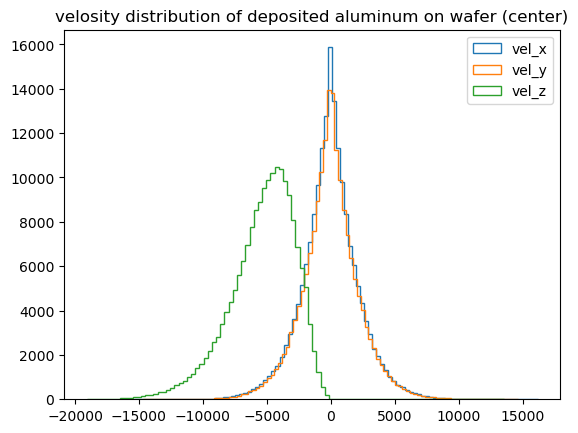

In [17]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [18]:
import depoSimulator_symmetry

In [19]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [41]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=5)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58192/index.html?ui=P_0x2235e450190_12&reconnect=auto" class="pyvi…

In [20]:
print(center_depo[:, 3:].shape)

(183382, 3)


In [21]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=2, tstep=1e-3)
deposit = test.run_afterCollision(2, 125, center_depo[:, 3:])

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

0
0
0
0
0
45
624
1764
291
259
321
319
319
330
358
409
425
437
441
443
511
497
550
568
568
620
639
649
658
673
727
785
784
728
778
839
844
869
900
911
920
943
964
930
919
1015
1019
1008
1077
1025
1003
1086
1084
1102
1088
1115
1124
1112
1141
1134
1144
1171
1217
1175
1193
1247
1218
1238
1267
1223
1203
1164
1241
1209
1157
1222
1202
1191
1174
1117
1207
1163
1198
1110
1105
1149
1097
1132
1147
1176
1123
1110
1106
1068
1052
1053
1112
1048
1053
1068


running:   1%|▌                                                  | 1.00/100 [00:42<1:10:45, 42.9s/B]

1033
987
983
947
986
993
988
947
888
894
928
1002
953
908
868
881
904
884
916
866
802
830
867
783
798
800
871
830
789
780
742
756
723
710
711
715
727
673
623
609
641
633
631
566
608
650
608
597
613
569
511
551
549
525
547
526
487
505
503
481
505
511
462
483
464
429
444
470
462
423
429
433
446
376
418
388
374
377
364
383
369
358
355
376
369
338
308
312
323
317
312
310
375
298
313
315
275
274
285
254


running:   2%|█                                                  | 2.00/100 [01:18<1:02:59, 38.6s/B]

273
259
239
251
250
248
231
240
265
263
220
241
241
212
219
208
207
182
224
184
211
226
220
192
216
199
206
177
191
180
177
190
179
195
175
183
137
159
158
170
163
161
144
124
151
157
163
159
145
139
163
143
136
141
153
125
121
129
116
132
114
134
113
121
142
141
116
134
122
128
118
111
103
110
123
114
97
113
118
95
104
105
102
104
110
107
96
105
97
106
116
94
95
95
109
91
94
85
92
81


running:   3%|█▌                                                   | 3.00/100 [01:51<58:34, 36.2s/B]

98
89
84
86
84
89
91
81
78
73
79
81
75
71
71
68
73
74
62
76
70
82
72
64
60
60
72
74
69
69
54
54
73
55
75
71
71
60
55
53
54
51
41
46
61
47
66
50
43
42
50
42
54
46
47
53
45
51
35
46
55
50
48
44
38
44
45
43
40
37
36
30
46
48
42
32
48
42
26
32
37
34
60
44
36
28
43
35
30
35
45
33
28
40
42
33
27
38
24
36


running:   4%|██                                                   | 4.00/100 [02:27<57:33, 36.0s/B]

23
36
32
27
31
46
39
36
43
28
30
37
24
29
40
22
32
31
28
29
18
30
18
32
30
22
28
15
18
30
34
30
26
18
24
19
22
26
18
28
22
27
24
25
28
17
23
21
23
19
17
26
20
11
16
22
23
16
27
18
20
18
17
9
16


running:   5%|██▋                                                  | 5.00/100 [02:52<54:46, 34.6s/B]

get i out:104
104
get j out:87
87
get k out:116
116


UnboundLocalError: cannot access local variable 'indice_inject' where it is not associated with a value

In [38]:
deposit = test.run_afterCollision(2, 88, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [04:15<00:00, 2.55s/B]


In [23]:
deposit = test.run_afterCollision(1, 1035, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [04:21<00:00, 2.61s/B]


In [25]:
deposit = test.run_afterCollision(1, 1037, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:46<00:00, 2.27s/B]


In [18]:
import torch

In [43]:
depo1 = torch.Tensor(deposit[:44, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:44, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58192/index.html?ui=P_0x22383f04650_13&reconnect=auto" class="pyvi…

In [21]:
edge_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
edge_indices |= np.logical_and(a[:,1] > 0.02, a[:,1] < 0.1)
edge_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(144108, 6)


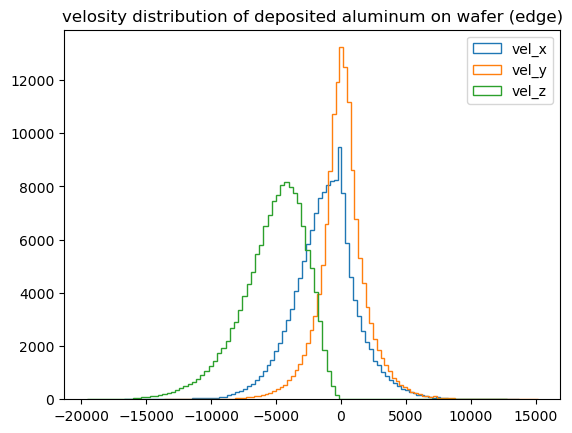

In [22]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()